In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import pyarrow.parquet as pq
from scipy import signal
import random
import csv

### Load the data

In [2]:
df1 = pd.read_csv('001_trial1_right_OpenBCI-RAW-2020-02-09_17-59-22.txt',
                  sep=', ',names=['1','2','7','8'],skiprows=6,usecols=[1,2,7,8], engine='python')
df1['key'] = 0
df2 = pd.read_csv('001_trial1_right_log_18-09-46-931825.txt')
df2.head()

,timestamp(ms),keypressed
0,18:09:48:685134,i
1,18:09:48:826228,i
2,18:09:50:589497,j
3,18:09:50:687236,j
4,18:09:54:730437,k


In [3]:
# df1.head()
len(df1['1'].values)

98494

In [4]:
df2.head()

,timestamp(ms),keypressed
0,18:09:48:685134,i
1,18:09:48:826228,i
2,18:09:50:589497,j
3,18:09:50:687236,j
4,18:09:54:730437,k


In [5]:
# len(head),len(content)
df1[:20]

,1,2,7,8,key
0,42577.90,-3345.36,-183506.11,-163093.72,0
1,42564.29,-3343.55,-183504.19,-163092.53,0
2,42599.99,-3347.24,-183499.44,-163088.47,0
3,42622.59,-3353.81,-183495.52,-163084.56,0
4,42593.48,-3355.22,-183493.05,-163084.06,0
5,42570.55,-3347.13,-183490.69,-163082.50,0
6,42601.33,-3347.15,-183486.22,-163079.94,0
7,42633.18,-3353.45,-183482.69,-163077.03,0
8,42610.05,-3350.39,-183479.97,-163076.09,0
9,42579.20,-3343.11,-183466.02,-163075.50,0


In [6]:
df1.head()

,1,2,7,8,key
0,42577.90,-3345.36,-183506.11,-163093.72,0
1,42564.29,-3343.55,-183504.19,-163092.53,0
2,42599.99,-3347.24,-183499.44,-163088.47,0
3,42622.59,-3353.81,-183495.52,-163084.56,0
4,42593.48,-3355.22,-183493.05,-163084.06,0


In [7]:
df1.columns
# df1['1'].values

Index(['1', '2', '7', '8', 'key'], dtype='object')

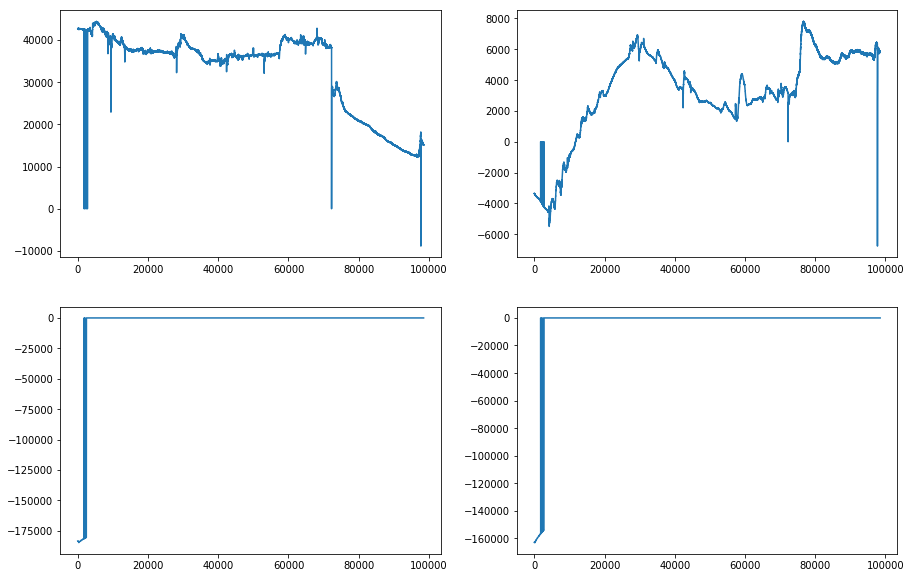

In [9]:
plt.figure(figsize=(15,10))
# plt.
cols = ['1','2','7','8']

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(df1[cols[i]].values)

plt.show()

### clean the data try some filters
##### start off by defining some filters

In [144]:
# simple convolution, takes the signal and window size, returns filtered signal
def box(sig, window):
    conv = np.repeat([0.,1.,0.], window)
    filtered = signal.convolve(sig, conv, mode='same') / window # normalising factor
    return filtered

# MMAV1
def mmav2(sig,window):
    conv = np.repeat([0.5,1.,0.5], window)
    filtered = signal.convolve(sig, conv, mode='same') / (2*window)
    return filtered

# MAVS - the slopey one
def mavs(sig,window):
    ar1 = np.asarray([4*k/ window for k in range(window//4)])
    ar2 = np.ones(window//2)
    ar3 = np.asarray([np.float(1 - 4*k/window) for k in range(window//4)])
    conv = np.concatenate([ar1,ar2,ar3])
    normalize = np.sum(conv)
    
    filtered = signal.convolve(sig, conv, mode='same') / normalize
    return filtered

def thresh(x,a):
    if x>a: return 1
    else: return 0

def willisen(sig,window):
    convolved = []
    for i in range(len(sig)-window):
        sa = np.sum([thresh(np.abs(sig[i+j] - sig[i+j+1]),0.0005) for j in range(window)])
        convolved.append(sa / window)
    return np.asarray(convolved)

#### apply some filters to the first column and plot them side by side

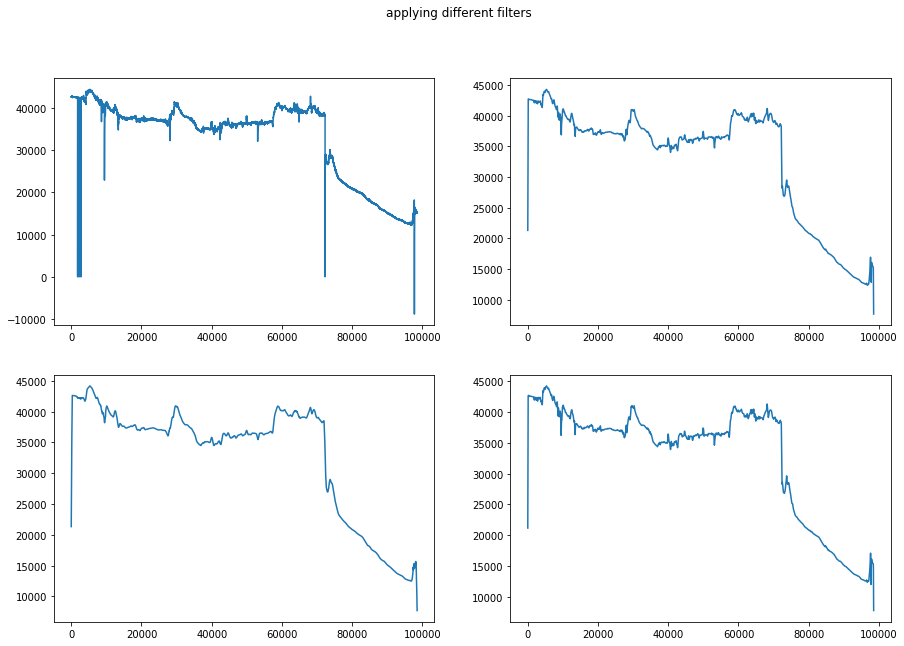

In [153]:
box_filt100 = box(df1['1'].values,window=200)
mmav2100 = mmav2(df1['1'].values,window=200)
mavs100 = mavs(df1['1'].values,window=200)
plt.figure(figsize=(15,10))
plt.suptitle("applying different filters")
plt.subplot(2,2,1)
plt.plot(df1['1'])
plt.subplot(2,2,2)
plt.plot(box_filt100)
plt.subplot(2,2,3)
plt.plot(mmav2100)
plt.subplot(2,2,4)
plt.plot(mavs100)

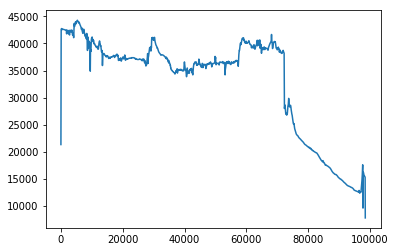

In [147]:
plt.plot(box_filt)

,timestamp(ms),keypressed
0,18:09:48:685134,i
1,18:09:48:826228,i
2,18:09:50:589497,j
3,18:09:50:687236,j
4,18:09:54:730437,k
